## Import Library

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import pickle
import streamlit as st

from sklearn.metrics import classification_report
from matplotlib.pyplot import imshow
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Import Data

In [106]:
# mendefinisikan df sebahai variabel untuk menyimpan  data csv
df= pd.read_csv('Ginjal_Kronis.csv' , sep=';')

# Memanggil 5 data dari keseluruhan pada data
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Data Understanding

In [107]:
# Mengecek ukuran dataset kolom dan baris
print ("Data Shape: ", df.shape)

Data Shape:  (400, 26)


In [108]:
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     329 non-null    float64
 17  wbcc    294 non-null    float64
 18  rbcc    269 non-null    float64
 19  htn     398 non-null    object 
 20  dm      398 non-null    object 
 21  cad     398 non-null    object 
 22  ap

In [109]:
# Mengecek jumlah data keseluruhan, mean, standar deviasi (std), nilai min dan max dari dataset
df.describe().style.background_gradient(cmap = 'copper')

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,200.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,1.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,100.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,200.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,300.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,400.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [110]:
#menghitung dan menampilkan frekuensi setiap nilai unik di kolom 'kelas' 
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

# cleaning data


In [111]:
df.duplicated().sum()

0

In [112]:
df = df.drop_duplicates()

In [113]:
df.duplicated().sum()


0

In [114]:
#menghitung jumlah total nilai yang hilang (NaNs) yang ada di setiap kolom DataFrame

df.isnull().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

# Exploratory Data Analysis (EDA)

<Axes: >

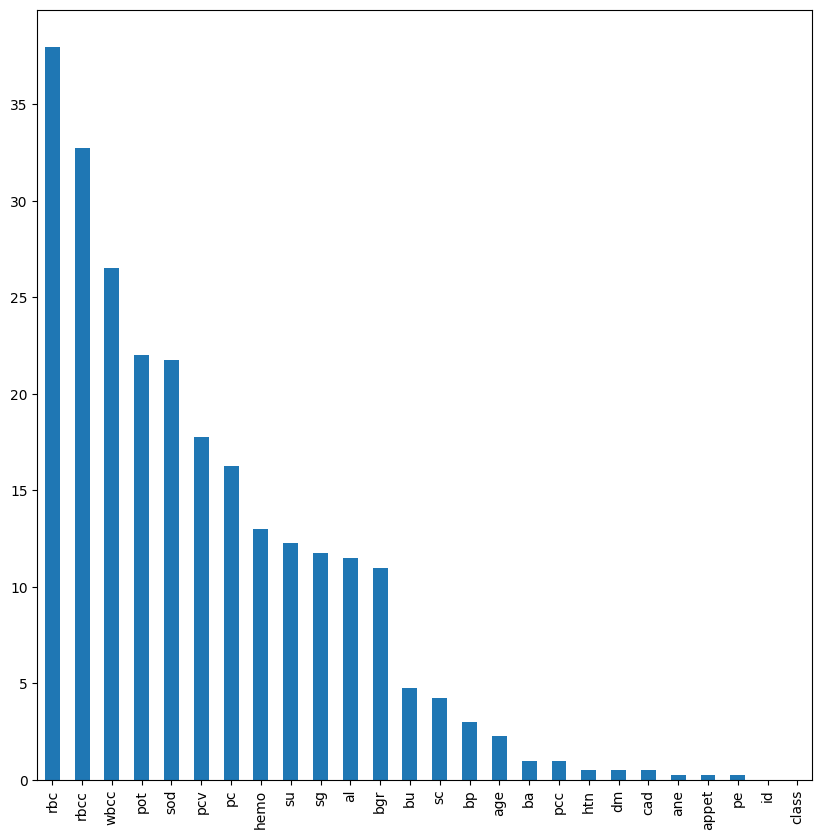

In [115]:
#memplot persentase nilai yang hilang untuk semua fitur
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

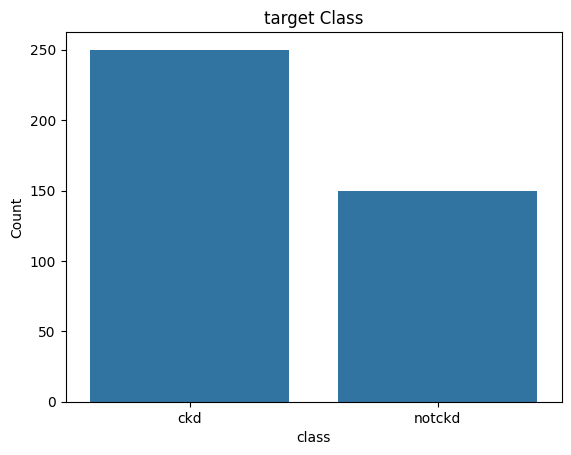

Persentasi sampel yang terkena penyakit ginjal:  62.5 %
Persentasi sampel yang tidak terkena penyakit ginjal:  37.5 %


In [116]:
sns.countplot(x='class', data=df)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

print('Persentasi sampel yang terkena penyakit ginjal: ', round(len(df[df['class']=='ckd'])/len(df)*100,2), "%")
print('Persentasi sampel yang tidak terkena penyakit ginjal: ', round(len(df[df['class']=='notckd'])/len(df)*100,2), "%")

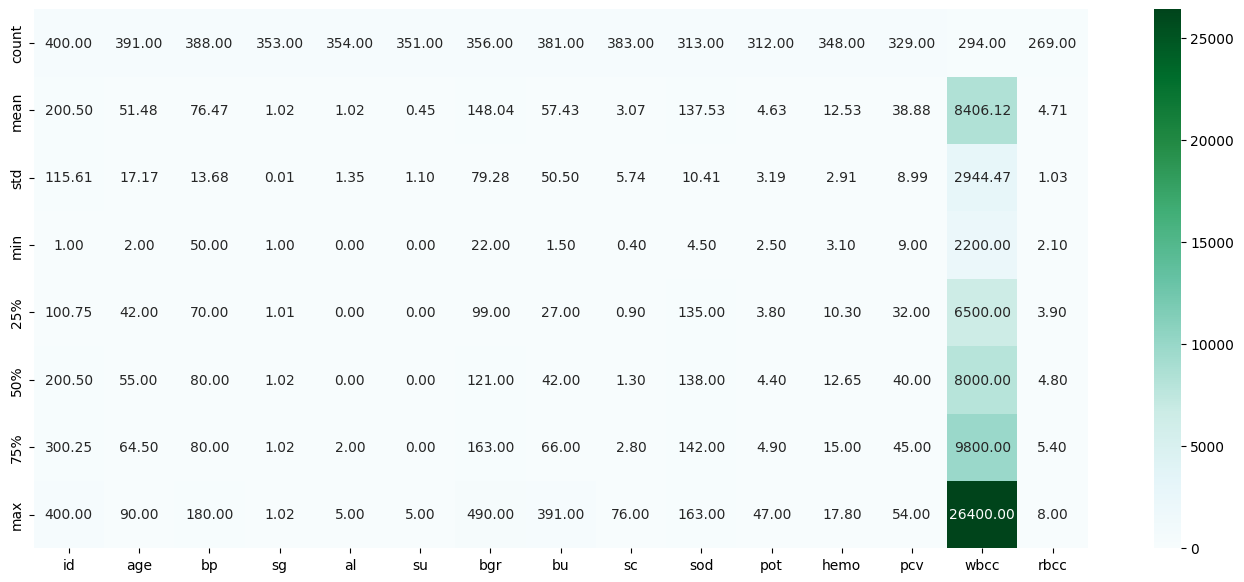

In [117]:
# mengecek korelasinya
fig, ax = plt.subplots(figsize=(17, 7))
sns.heatmap(df.describe(),annot=True, fmt='.2f',cmap='BuGn')
plt.show()

dari korelasi diatas nilai tertinggi dari data penyakit ginjal adalah 'wbcc = jumlah sel darah ' yaitu sekitar 26400.00

# Transformasi Data

In [118]:
# menetapkan daftar nama kolom baru ke df.columns atribut 
# mengganti nama data dan menetapkan nama asli
df.columns = [
    'id',
    'umur',
    'tekanan_darah',
    'berat_jenis',
    'albumin',
    'gula',
    'sel_Darah_merah',
    'sel_nanah',
    'gumpalan_sel_nanah',
    'bacteria',
    'glukosa_darah_acak',
    'urea_darah',
    'kreatinin_serum',
    'natrium',
    'kalium',
    'haemoglobin',
    'volume_sel_yang_dikemas',
    'jumlah_sel_darah_putih',
    'jumlah_sel_darah_merah',
    'hipertensi',
    'diabetes_mellitus',
    'penyakit_arteri_koroner',
    'nafsu_makan',
    'pedal_edema',
    'anemia ',
    'class']

In [119]:
# menghapus dua kolom tertentu, 'id' dan 'age'
df = df.drop(['id','umur'], axis=1)

In [120]:
# transformasi ke bentuk angka, memisahkan antara numeric dan categori nya
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])



In [121]:
#mengecek data numeric
numerical

['tekanan_darah',
 'berat_jenis',
 'albumin',
 'gula',
 'glukosa_darah_acak',
 'urea_darah',
 'kreatinin_serum',
 'natrium',
 'kalium',
 'haemoglobin',
 'volume_sel_yang_dikemas',
 'jumlah_sel_darah_putih',
 'jumlah_sel_darah_merah']

In [122]:
#mengecek data categorical
catgcols

['sel_Darah_merah',
 'sel_nanah',
 'gumpalan_sel_nanah',
 'bacteria',
 'hipertensi',
 'diabetes_mellitus',
 'penyakit_arteri_koroner',
 'nafsu_makan',
 'pedal_edema',
 'anemia ',
 'class']

In [123]:
#untuk mengecek label 'class sudah mennjadi lebel/target'
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [124]:
##misahkan fitur dan label
## semua atribut kecuali label class ini
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

In [125]:
#mengecek depcol 'class'
df[dep_col].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

Transformasi Data

In [126]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [127]:
df['class'] = le.fit_transform(df['class'])

In [128]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [129]:
df.head()

,tekanan_darah,berat_jenis,albumin,gula,sel_Darah_merah,sel_nanah,gumpalan_sel_nanah,bacteria,glukosa_darah_acak,urea_darah,...,volume_sel_yang_dikemas,jumlah_sel_darah_putih,jumlah_sel_darah_merah,hipertensi,diabetes_mellitus,penyakit_arteri_koroner,nafsu_makan,pedal_edema,anemia,class
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [130]:
df.isnull().sum()

tekanan_darah              0
berat_jenis                0
albumin                    0
gula                       0
sel_Darah_merah            0
sel_nanah                  0
gumpalan_sel_nanah         0
bacteria                   0
glukosa_darah_acak         0
urea_darah                 0
kreatinin_serum            0
natrium                    0
kalium                     0
haemoglobin                0
volume_sel_yang_dikemas    0
jumlah_sel_darah_putih     0
jumlah_sel_darah_merah     0
hipertensi                 0
diabetes_mellitus          0
penyakit_arteri_koroner    0
nafsu_makan                0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [131]:
df.corr()

,tekanan_darah,berat_jenis,albumin,gula,sel_Darah_merah,sel_nanah,gumpalan_sel_nanah,bacteria,glukosa_darah_acak,urea_darah,...,volume_sel_yang_dikemas,jumlah_sel_darah_putih,jumlah_sel_darah_merah,hipertensi,diabetes_mellitus,penyakit_arteri_koroner,nafsu_makan,pedal_edema,anemia,class
tekanan_darah,1.000000,-0.166980,0.123518,0.189561,-0.150384,-0.156231,0.056808,0.110164,0.150180,0.180841,...,-0.289237,0.022177,-0.219317,0.266901,0.226489,0.084135,0.175054,0.056902,0.195134,-0.293693
berat_jenis,-0.166980,1.000000,-0.479962,-0.292053,0.253894,0.365353,-0.306426,-0.231704,-0.299413,-0.244995,...,0.496434,-0.195068,0.432222,-0.323643,-0.351016,-0.135814,-0.230975,-0.253803,-0.184155,0.659504
albumin,0.123518,-0.479962,1.000000,0.287751,-0.394844,-0.561713,0.417868,0.377935,0.293150,0.347418,...,-0.473446,0.202920,-0.405092,0.406057,0.308101,0.200957,0.303145,0.411080,0.229556,-0.531562
gula,0.189561,-0.292053,0.287751,1.000000,-0.092940,-0.190062,0.168091,0.119399,0.627002,0.126897,...,-0.181285,0.156649,-0.161994,0.254268,0.430514,0.229301,0.069216,0.116442,0.042464,-0.294555
sel_Darah_merah,-0.150384,0.253894,-0.394844,-0.092940,1.000000,0.377394,-0.102948,-0.184402,-0.138615,-0.233935,...,0.279875,0.003471,0.196534,-0.140538,-0.145646,-0.111493,-0.160868,-0.199285,-0.107625,0.282642
sel_nanah,-0.156231,0.365353,-0.561713,-0.190062,0.377394,1.000000,-0.520118,-0.330401,-0.247665,-0.344501,...,0.418435,-0.106733,0.381949,-0.291719,-0.201032,-0.172295,-0.274985,-0.350227,-0.260566,0.375154
gumpalan_sel_nanah,0.056808,-0.306426,0.417868,0.168091,-0.102948,-0.520118,1.000000,0.275082,0.195223,0.189094,...,-0.296580,0.163215,-0.263810,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,-0.265313
bacteria,0.110164,-0.231704,0.377935,0.119399,-0.184402,-0.330401,0.275082,1.000000,0.079162,0.161676,...,-0.189420,0.104748,-0.192212,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,-0.186871
glukosa_darah_acak,0.150180,-0.299413,0.293150,0.627002,-0.138615,-0.247665,0.195223,0.079162,1.000000,0.118859,...,-0.258200,0.119881,-0.214094,0.367816,0.503254,0.207020,0.177285,0.094806,0.112449,-0.379321
urea_darah,0.180841,-0.244995,0.347418,0.126897,-0.233935,-0.344501,0.189094,0.161676,0.118859,1.000000,...,-0.523091,0.038362,-0.465243,0.395601,0.315958,0.224782,0.274123,0.338740,0.436321,-0.369393


In [132]:
df.to_csv('Kroniz.csv',index=False)

# fiture selection

mengapus beberapa fitur

In [133]:
# Wrapper Methods
# Recursive Feature Elimination (RFE)

x = df.drop('class', axis=1)
y = df['class']

# Memilih 10 fitur terbaik dengan RFE dan regresi linier
selector = RFE(estimator=LinearRegression(), n_features_to_select=10)
selected_features = selector.fit_transform(x, y)

# Melihat ranking fitur berdasarkan RFE
ranking = selector.ranking_

# Menampilkan nama fitur dan rankingnya
features_names = x.columns
for i, rank in enumerate(ranking):
    print(f"Fitur: {features_names[i]} - Ranking: {rank}")

Fitur: tekanan_darah - Ranking: 7
Fitur: berat_jenis - Ranking: 1
Fitur: albumin - Ranking: 1
Fitur: gula - Ranking: 4
Fitur: sel_Darah_merah - Ranking: 3
Fitur: sel_nanah - Ranking: 2
Fitur: gumpalan_sel_nanah - Ranking: 1
Fitur: bacteria - Ranking: 1
Fitur: glukosa_darah_acak - Ranking: 13
Fitur: urea_darah - Ranking: 12
Fitur: kreatinin_serum - Ranking: 10
Fitur: natrium - Ranking: 5
Fitur: kalium - Ranking: 8
Fitur: haemoglobin - Ranking: 1
Fitur: volume_sel_yang_dikemas - Ranking: 9
Fitur: jumlah_sel_darah_putih - Ranking: 14
Fitur: jumlah_sel_darah_merah - Ranking: 11
Fitur: hipertensi - Ranking: 1
Fitur: diabetes_mellitus - Ranking: 1
Fitur: penyakit_arteri_koroner - Ranking: 1
Fitur: nafsu_makan - Ranking: 1
Fitur: pedal_edema - Ranking: 6
Fitur: anemia  - Ranking: 1


# splitting data

In [134]:
# x adalah atribut yang mempengaruhi stoke
# y adalah label itu sendiri

x = df.drop(columns=['class'])
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape, x_train.shape, x_test.shape)

(400, 23) (320, 23) (80, 23)


In [135]:
# Scaling
## membantu meningkatkan performa model machine learning dan mempermudah interpretasi hasil model
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[ 0.25421378  0.4214856   0.07624929 ... -0.4843221  -0.42008403
  -0.77459667]
 [-1.97247624  0.4214856   2.36372784 ... -0.4843221  -0.42008403
  -0.77459667]
 [ 0.25421378 -1.4210744   0.83874214 ... -0.4843221   2.38047614
  -0.77459667]
 ...
 [ 0.25421378  0.4214856  -0.68624357 ... -0.4843221  -0.42008403
   1.29099445]
 [-1.23024623  1.3427656  -0.68624357 ... -0.4843221  -0.42008403
   1.29099445]
 [ 0.25421378  1.3427656  -0.68624357 ... -0.4843221  -0.42008403
   1.29099445]]


## Membuat Model decison tree

In [136]:
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, 
    class_weight=None,
    criterion='entropy',
    max_depth=4, 
    max_features=None, 
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, 
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=42, 
    splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f'akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}' )
print(f'akurasi data testing = {dtc_acc}\n')

print(f'confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n')
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'class report : \n {classification_report(y_test, dtc.predict(x_test))}')


akurasi data training = 0.990625
akurasi data testing = 0.9875

confusion matrix : 
[[51  1]
 [ 0 28]]

class report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [137]:
# fix 97%
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Mengubah parameter untuk menurunkan akurasi
dtc = DecisionTreeClassifier(
    criterion='gini',  
    max_depth=3,  # Mengurangi percabangan lebih jauh
    min_samples_split=10,  # Meningkatkan jumlah sampel minimum untuk memecah node
    min_samples_leaf=5,  # Meningkatkan jumlah sampel minimum 
    random_state=42
)

# Melatih model
model = dtc.fit(x_train, y_train)

# Menghitung akurasi
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f'akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}')
print(f'akurasi data testing = {dtc_acc}\n')

# Menampilkan confusion matrix dan classification report
print(f'confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n')
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'class report : \n {classification_report(y_test, dtc.predict(x_test))}')


akurasi data training = 0.98125
akurasi data testing = 0.975

confusion matrix : 
[[50  2]
 [ 0 28]]

class report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



## model svm

In [138]:
# fix pemodelan svm 92.5
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

svm = SVC(
    kernel='linear',
    C = 0.001, 
    random_state=42)

model = svm.fit(x_train, y_train)

svm_acc = accuracy_score(y_test, svm.predict(x_test))

print(f'akurasi data training = {accuracy_score(y_train, svm.predict(x_train))}' )
print(f'akurasi data testing = {svm_acc}\n')

print(f'confusion matrix : \n{confusion_matrix(y_test, svm.predict(x_test))}\n')
confusion = confusion_matrix(y_test, svm.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'class report : \n {classification_report(y_test, svm.predict(x_test))}')

akurasi data training = 0.94375
akurasi data testing = 0.925

confusion matrix : 
[[49  3]
 [ 3 25]]

class report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



In [139]:
# ini yang 95.5
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

svm = SVC(
    kernel='linear',
    C = 0.01, 
    random_state=42)

model = svm.fit(x_train, y_train)

svm_acc = accuracy_score(y_test, svm.predict(x_test))

print(f'akurasi data training = {accuracy_score(y_train, svm.predict(x_train))}' )
print(f'akurasi data testing = {svm_acc}\n')

print(f'confusion matrix : \n{confusion_matrix(y_test, svm.predict(x_test))}\n')
confusion = confusion_matrix(y_test, svm.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'class report : \n {classification_report(y_test, svm.predict(x_test))}')

akurasi data training = 0.96875
akurasi data testing = 0.95

confusion matrix : 
[[50  2]
 [ 2 26]]

class report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



kernel yang lain

In [140]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

svm = SVC(kernel='poly', degree=3, C=1.0, random_state=42)

model = svm.fit(x_train, y_train)

svm_acc = accuracy_score(y_test, svm.predict(x_test))

print(f'akurasi data training = {accuracy_score(y_train, svm.predict(x_train))}' )
print(f'akurasi data testing = {svm_acc}\n')

print(f'confusion matrix : \n{confusion_matrix(y_test, svm.predict(x_test))}\n')
confusion = confusion_matrix(y_test, svm.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'class report : \n {classification_report(y_test, svm.predict(x_test))}')

akurasi data training = 0.61875
akurasi data testing = 0.65

confusion matrix : 
[[52  0]
 [28  0]]

class report : 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [141]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

svm = SVC(kernel='sigmoid', C=1.0, random_state=42)

model = svm.fit(x_train, y_train)

svm_acc = accuracy_score(y_test, svm.predict(x_test))

print(f'akurasi data training = {accuracy_score(y_train, svm.predict(x_train))}' )
print(f'akurasi data testing = {svm_acc}\n')

print(f'confusion matrix : \n{confusion_matrix(y_test, svm.predict(x_test))}\n')
confusion = confusion_matrix(y_test, svm.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'class report : \n {classification_report(y_test, svm.predict(x_test))}')

akurasi data training = 0.61875
akurasi data testing = 0.65

confusion matrix : 
[[52  0]
 [28  0]]

class report : 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

akurasi yang dihasilkan pada model svm yang didapatkan yaitu 92,50%

jadi dapat disimpulkan bahwa diantar model decision tree dan svm yang memilili akurasi yang paling baik yaitu decision tree yaitu dengan akurasi 1.0 dan scm dengan akurasi 92.50%

# Save Model

In [142]:
# cek library kita
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import pandas
print('pandas:', pandas.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

IPython: 8.24.0
numpy: 1.26.4
pandas: 2.2.2
scikit-learn: 1.4.2


In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()
scaler.fit(x_train)

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [145]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [146]:
data_diskalaan_uji = scaler.transform(x_test)

yang tidak di pakai

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [149]:
scaler = StandardScaler()
scaler.fit(x_train)
x = scaler.transform(x)

c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [150]:
data_diskalaan_uji = scaler.transform(x_test)

lanjut ini yang dipakai

In [151]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=42)

model_dtc.fit(x_train, y_train)

y_pred = model_dtc.predict(x_test)
print(classification_report(y_test, y_pred))

# load model
filename = 'ginjal_model.pkl'
pickle.dump(model_dtc, open(filename, 'wb'))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [152]:
import pickle

In [153]:
# load model
filename = 'ginjal_model.pkl'
pickle.dump(model_dtc, open(filename, 'wb'))

In [154]:
## simulasi model
input_data = (100.0,1.02,0.0,0.0,1,1,0,0,103.0,79.0,5.3,135.0,6.3,6.3,19.0,7200.0,2.6,1,0,1,1,0,0) # tidak feature yang di seleksi

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
  print('pasien tidak terkena batu ginjal')
else:
    print('pasien terkena batu ginjal')

[0]
pasien tidak terkena batu ginjal


c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


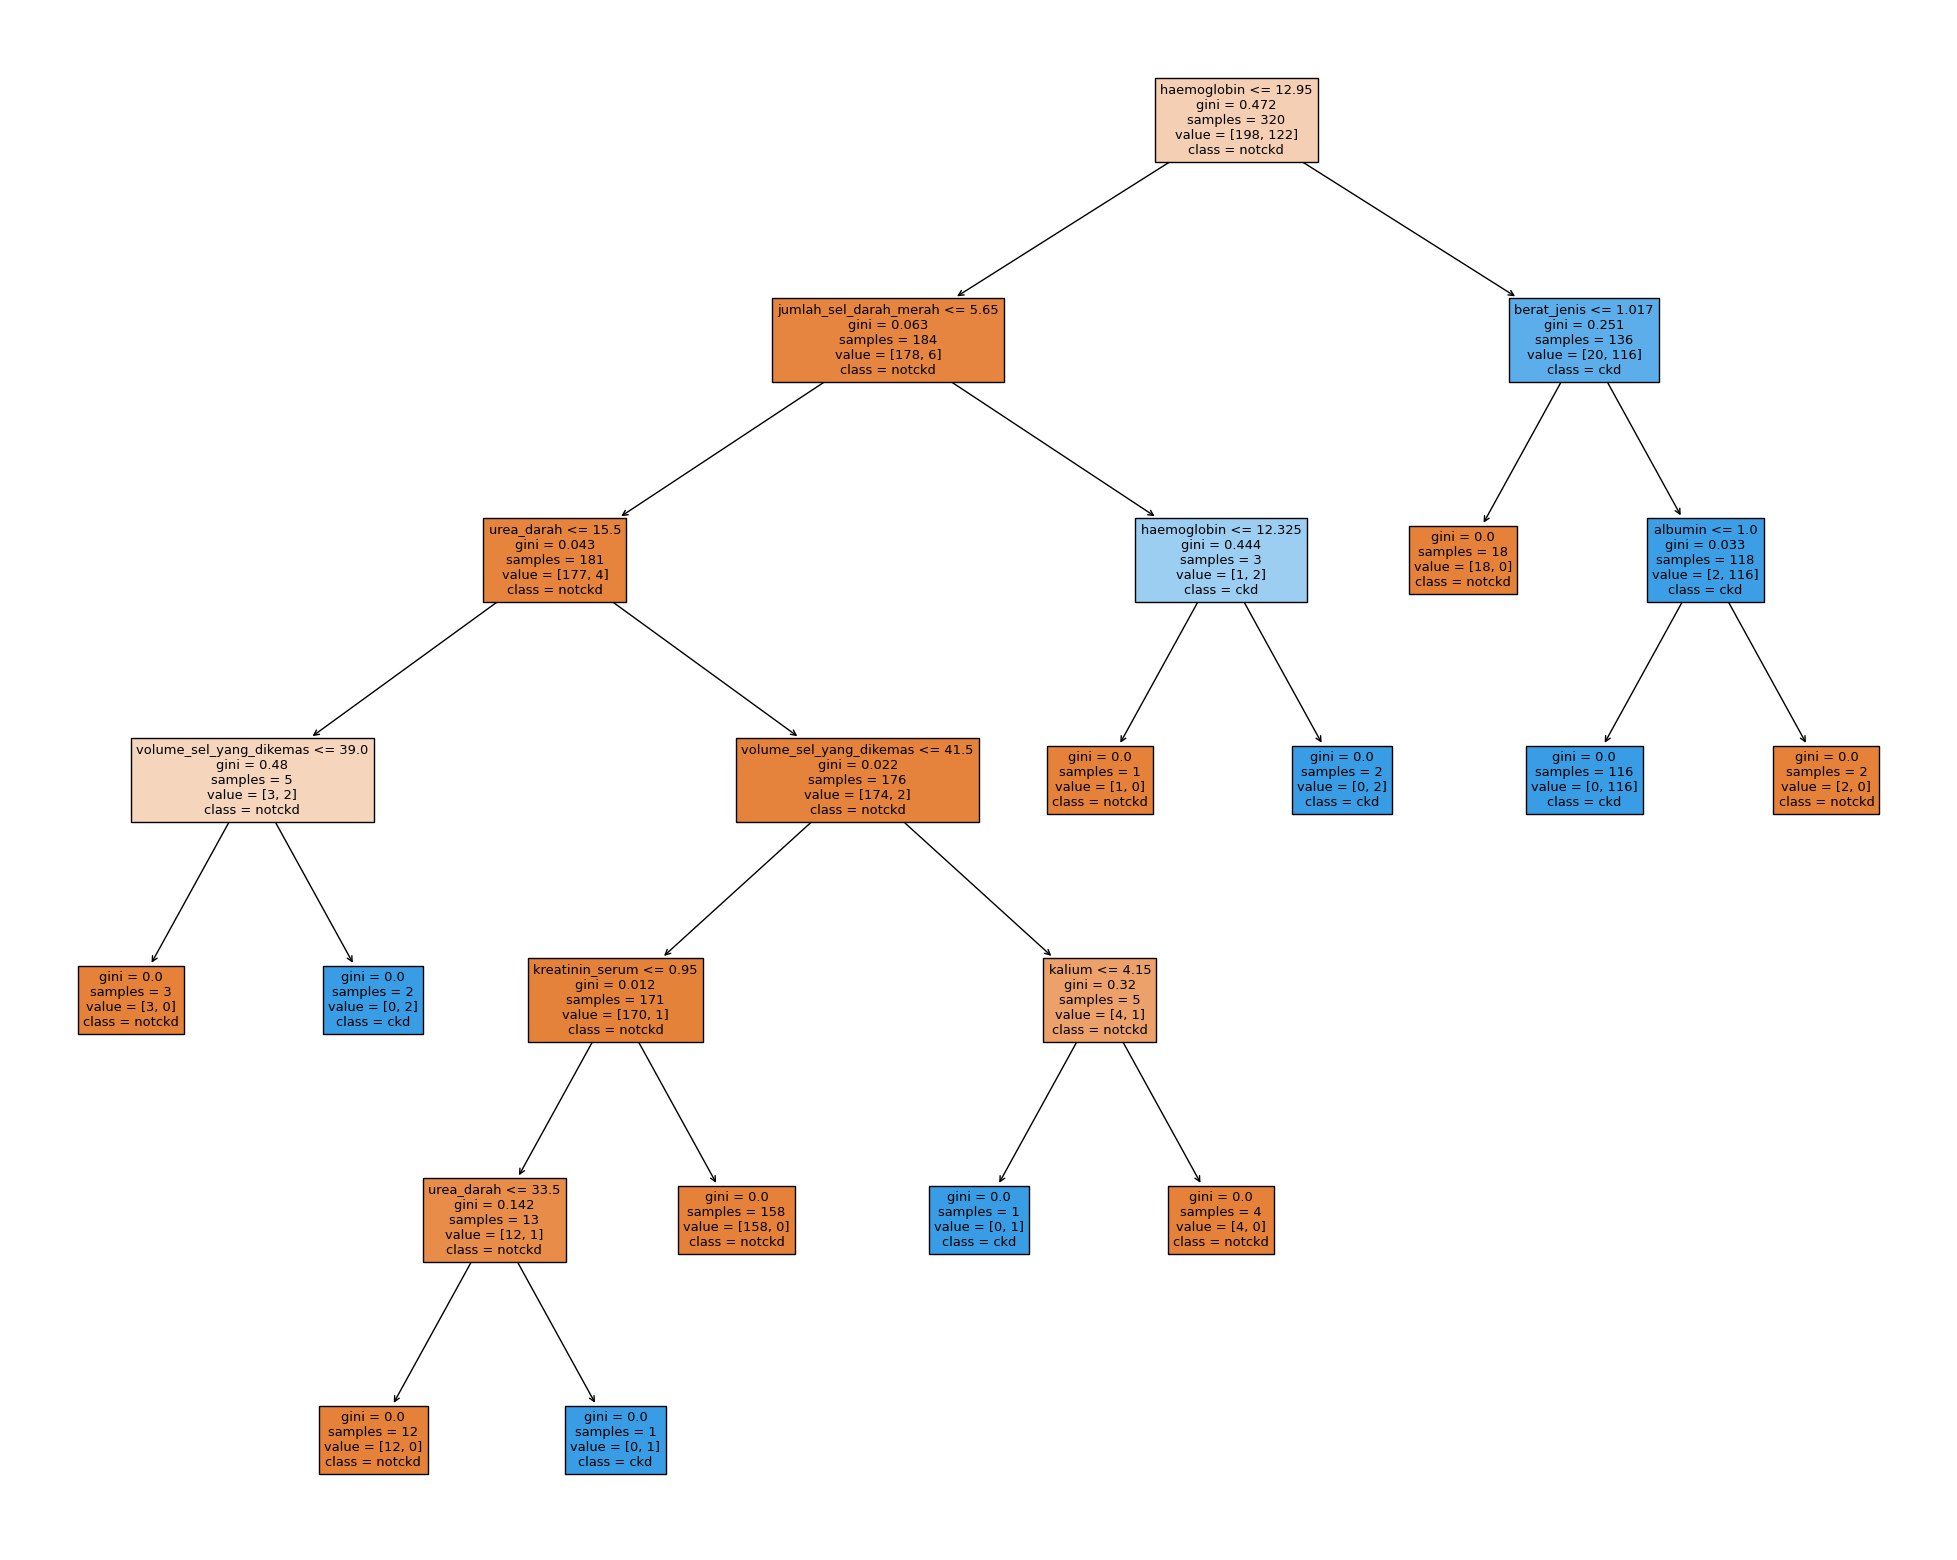

In [157]:
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(model_dtc,
                feature_names=ind_col,
                class_names=['notckd','ckd'],
                filled=True)